## Introduction
This project aims to predict individuals' likelihood of receiving the H1N1 and seasonal flu vaccines using machine learning models. Using a dataset from DrivenData that includes demographic, behavioral, and health-related features, we frame this as a classification problem. Logistic Regression and Decision Trees are used to build predictive models, with performance evaluated using metrics such as ROC-AUC. The project demonstrates the full data science pipeline, from preprocessing to model interpretation, providing insights into factors influencing vaccine uptake. These findings can inform targeted public health strategies to improve vaccination rates and address vaccine hesitancy

## Business Problem
Despite the availability of vaccines, many individuals choose not to receive them, leaving communities vulnerable to seasonal flu outbreaks and pandemics like H1N1. Public health organizations need to understand the factors influencing vaccination uptake to design effective, targeted interventions.

Key Business Questions:

1. What factors influence an individual's likelihood to receive the H1N1 and seasonal flu vaccines?
2. How can predictive modeling help identify high-risk groups who are less likely to vaccinate?
3. What actionable strategies can public health organizations implement to increase vaccination rates?

## Objectives
To develop a predictive model to estimate the likelihood of individuals receiving two specific vaccines: the H1N1 vaccine and the seasonal flu vaccine.

## Data
The data for this competition comes from the National 2009 H1N1 Flu Survey (NHFS). https://www.drivendata.org/competitions/66/flu-shot-learning/data/

The source dataset comes with the following data use restrictions:
1. Use the data in these data files for statistical reporting and analysis only.
2. Make no use of the identity of any person or establishment discovered inadvertently and advise the Director, NCHS, of any such discovery (1 (800) 232-4636).
3. Not link these data files with individually identifiable data from other NCHS or non-NCHS data files.

## Exploratory Data Analysis

In [64]:
# Import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

#### Load the Data

In [65]:
# Load the data 
train_data=pd.read_csv('D:\\MORINGA\\Phase 3\\Phase 3 Project\\Data\\training_set_features.csv')
train_labels = pd.read_csv('D:\\MORINGA\\Phase 3\\Phase 3 Project\\Data\\training_set_labels.csv')
test_data=pd.read_csv('D:\\MORINGA\\Phase 3\\Phase 3 Project\\Data\\test_set_features.csv')

In [66]:
# Basic info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [67]:
# test_data info
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [68]:
# Check missing values in train_features
train_data.isnull().sum().sort_values()


respondent_id                      0
sex                                0
hhs_geo_region                     0
census_msa                         0
race                               0
age_group                          0
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_antiviral_meds         71
behavioral_outside_home           82
behavioral_large_gatherings       87
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_touch_face            128
behavioral_avoidance             208
household_children               249
household_adults                 249
opinion_h1n1_risk                388
opinion_h1n1_vacc_effective      391
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
health_worker                    804
child_under_6_months             820
chronic_med_condition            971
education                       1407
m

#### Dealing with missing values

In [69]:
# Fill missing categorical features with the mode
categorical_columns = train_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)
    test_data[col].fillna(train_data[col].mode()[0], inplace=True)

# Fill missing numerical features with the median
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    train_data[col].fillna(train_data[col].median(), inplace=True)
    test_data[col].fillna(train_data[col].median(), inplace=True)


**Check for duplicates**


In [70]:
train_data.duplicated().sum()

0

**Analyze target variables**

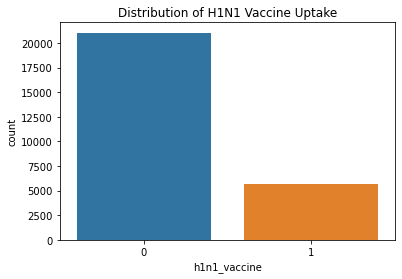

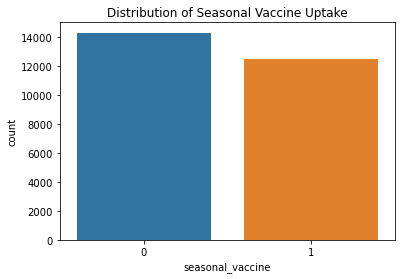

In [71]:
# Distribution of vaccine targets
sns.countplot(x='h1n1_vaccine', data=train_labels)
plt.title('Distribution of H1N1 Vaccine Uptake')
plt.show()

sns.countplot(x='seasonal_vaccine', data=train_labels)
plt.title('Distribution of Seasonal Vaccine Uptake')
plt.show()


**Observation**
> Most of the respondents didn't get either of the vaccines

**Analyze the features**

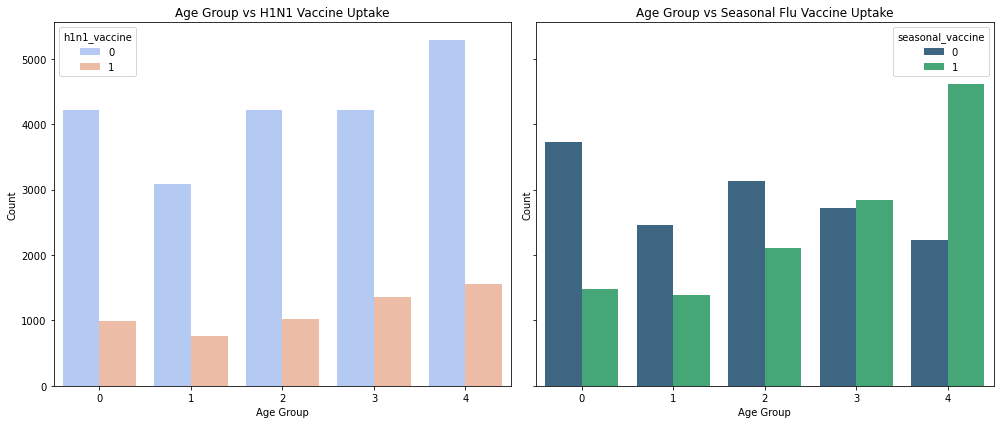

In [84]:
# Combine train data and labels
data_combined = pd.concat([train_data, train_labels], axis=1)

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# H1N1 vaccine uptake
sns.countplot(x="age_group", hue="h1n1_vaccine", data=data_combined, ax=axes[0], palette="coolwarm")
axes[0].set_title("Age Group vs H1N1 Vaccine Uptake")
axes[0].set_xlabel("Age Group")
axes[0].set_ylabel("Count")

# Seasonal flu vaccine uptake
sns.countplot(x="age_group", hue="seasonal_vaccine", data=data_combined, ax=axes[1], palette="viridis")
axes[1].set_title("Age Group vs Seasonal Flu Vaccine Uptake")
axes[1].set_xlabel("Age Group")
axes[1].set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()


**Observation**
> A smaller proportion of individuals chose to vaccinate against H1N1.Individuals aged 65 and above had a lower likelihood of receiving the H1N1 vaccine and a higher likelihood of receiving the seasonal vaccine.

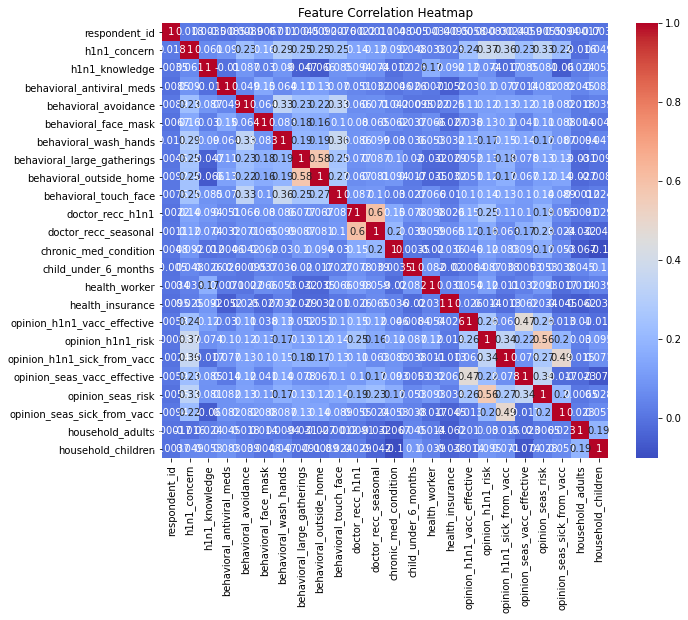

In [74]:
# Correlation heatmap
correlation = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

#### Data Preprocessing

In [75]:
# Label encoding for categorical features
encoder = LabelEncoder()
for col in categorical_columns:
    train_data[col] = encoder.fit_transform(train_data[col])
    test_data[col] = encoder.transform(test_data[col])


In [76]:
# Combine features and labels
data = train_data.copy()
data['h1n1_vaccine'] = train_labels['h1n1_vaccine']
data['seasonal_vaccine'] = train_labels['seasonal_vaccine']

# Split data for H1N1 and seasonal vaccine prediction
X_h1n1 = data.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])
y_h1n1 = data['h1n1_vaccine']
X_seasonal = data.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])
y_seasonal = data['seasonal_vaccine']

X_h1n1_train, X_h1n1_val, y_h1n1_train, y_h1n1_val = train_test_split(X_h1n1, y_h1n1, test_size=0.2, random_state=42)
X_seasonal_train, X_seasonal_val, y_seasonal_train, y_seasonal_val = train_test_split(X_seasonal, y_seasonal, test_size=0.2, random_state=42)



#### Model Building

**Baseline Model (Logistic Regression Model)**

In [77]:
# H1N1 Logistic Regression
lr_h1n1 = LogisticRegression(max_iter=1000)
lr_h1n1.fit(X_h1n1_train, y_h1n1_train)
y_h1n1_pred = lr_h1n1.predict(X_h1n1_val)
print("H1N1 Vaccine Logistic Regression Report:")
print(classification_report(y_h1n1_val, y_h1n1_pred))

# Seasonal Logistic Regression
lr_seasonal = LogisticRegression(max_iter=1000)
lr_seasonal.fit(X_seasonal_train, y_seasonal_train)
y_seasonal_pred = lr_seasonal.predict(X_seasonal_val)
print("Seasonal Vaccine Logistic Regression Report:")
print(classification_report(y_seasonal_val, y_seasonal_pred))



H1N1 Vaccine Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4212
           1       0.63      0.33      0.43      1130

    accuracy                           0.82      5342
   macro avg       0.73      0.64      0.66      5342
weighted avg       0.80      0.82      0.79      5342

Seasonal Vaccine Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2891
           1       0.73      0.72      0.73      2451

    accuracy                           0.75      5342
   macro avg       0.75      0.75      0.75      5342
weighted avg       0.75      0.75      0.75      5342



**Observation**
> The H1N1 vaccine model has higher accuracy (82%) than the seasonal vaccine model (75%), but its performance for minority Class 1 is suboptimal, suggesting potential room for improvement.
1. For the H1N1 vaccine, the model performs well in identifying individuals who did not receive the vaccine (Class 0), but struggles with accurately predicting those who received it (Class 1), as shown by the lower recall and F1-score for Class 1.
2. For the seasonal vaccine, the model achieves more balanced performance across both classes, with similar precision, recall, and F1-scores.

**Decision Tree Classifier**

In [78]:
# Initialize Decision Tree classifiers
dt_h1n1 = DecisionTreeClassifier(random_state=42)
dt_seasonal = DecisionTreeClassifier(random_state=42)

# Train the models
dt_h1n1.fit(X_h1n1_train, y_h1n1_train)
dt_seasonal.fit(X_seasonal_train, y_seasonal_train)

# Predict probabilities
dt_h1n1_probs = dt_h1n1.predict_proba(X_h1n1_val)[:, 1]
dt_seasonal_probs = dt_seasonal.predict_proba(X_seasonal_val)[:, 1]

# Calculate AUC
h1n1_auc = roc_auc_score(y_h1n1_val, dt_h1n1_probs)
seasonal_auc = roc_auc_score(y_seasonal_val, dt_seasonal_probs)
print(f"H1N1 Vaccine AUC: {h1n1_auc}")
print(f"Seasonal Vaccine AUC: {seasonal_auc}")



H1N1 Vaccine AUC: 0.6365241745035256
Seasonal Vaccine AUC: 0.676569090387436


**Observation**
> The Seasonal vaccine model is performing slightly better than the H1N1 vaccine model based on these AUC scores. However, both are somewhat lower than ideal, indicating there may be room for improvement in the models' predictive accuracy.

#### Model Evaluation

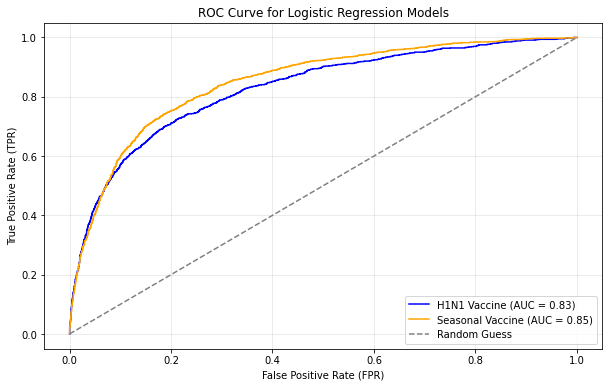

In [86]:
# Train logistic regression for H1N1 vaccine
logreg_h1n1 = LogisticRegression(max_iter=1000, random_state=42)
logreg_h1n1.fit(X_h1n1_train, y_h1n1_train)

# Train logistic regression for seasonal vaccine
logreg_seasonal = LogisticRegression(max_iter=1000, random_state=42)
logreg_seasonal.fit(X_seasonal_train, y_seasonal_train)
# Generate ROC curves for H1N1 vaccine
fpr_h1n1, tpr_h1n1, _ = roc_curve(y_h1n1_val, logreg_h1n1.predict_proba(X_h1n1_val)[:, 1])
roc_auc_h1n1 = auc(fpr_h1n1, tpr_h1n1)

# Generate ROC curves for seasonal vaccine
fpr_seasonal, tpr_seasonal, _ = roc_curve(y_seasonal_val, logreg_seasonal.predict_proba(X_seasonal_val)[:, 1])
roc_auc_seasonal = auc(fpr_seasonal, tpr_seasonal)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_h1n1, tpr_h1n1, label=f"H1N1 Vaccine (AUC = {roc_auc_h1n1:.2f})", color='blue')
plt.plot(fpr_seasonal, tpr_seasonal, label=f"Seasonal Vaccine (AUC = {roc_auc_seasonal:.2f})", color='orange')

# Plot the diagonal line for random predictions
plt.plot([0, 1], [0, 1], color="grey", linestyle="--", label="Random Guess")

# Customize the plot
plt.title("ROC Curve for Logistic Regression Models")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


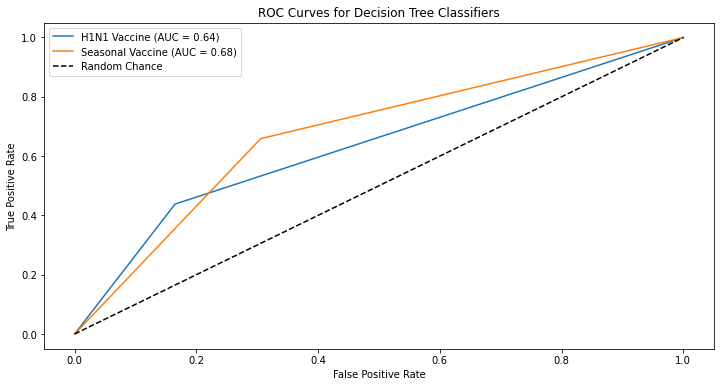

In [79]:
# Plot ROC curves
plt.figure(figsize=(12, 6))

# H1N1 ROC Curve
fpr_h1n1, tpr_h1n1, _ = roc_curve(y_h1n1_val, dt_h1n1_probs)
plt.plot(fpr_h1n1, tpr_h1n1, label=f"H1N1 Vaccine (AUC = {h1n1_auc:.2f})")

# Seasonal ROC Curve
fpr_seasonal, tpr_seasonal, _ = roc_curve(y_seasonal_val, dt_seasonal_probs)
plt.plot(fpr_seasonal, tpr_seasonal, label=f"Seasonal Vaccine (AUC = {seasonal_auc:.2f})")

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Decision Tree Classifiers')
plt.legend()
plt.show()


**Observation**
> Both models have AUCs greater than 0.5, indicating that both are performing better than random guessing. However, neither model has an exceptionally high AUC, suggesting there is room for improvement.
The Seasonal Vaccine model is performing slightly better than the H1N1 Vaccine model, as its curve is higher, and its AUC is 0.68 compared to 0.64 for H1N1.

**Compare the Models**

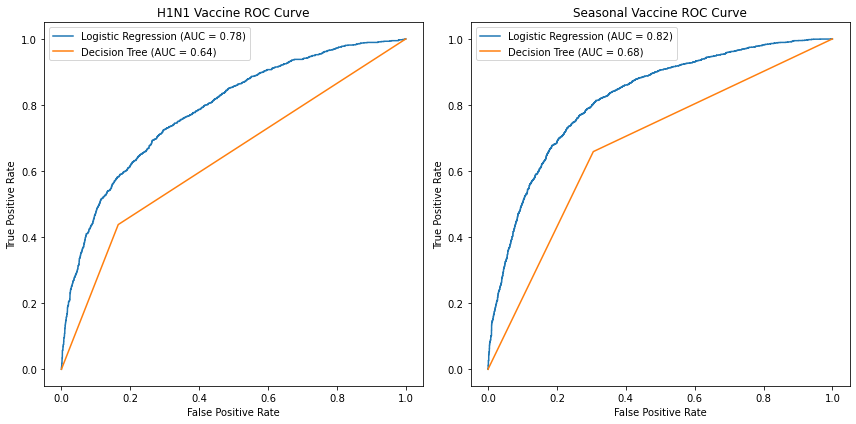

In [80]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix, log_loss

# Logistic Regression for H1N1 Vaccine
h1n1_lr_auc = roc_auc_score(y_h1n1_val, lr_h1n1.predict_proba(X_h1n1_val)[:, 1])
h1n1_lr_fpr, h1n1_lr_tpr, _ = roc_curve(y_h1n1_val, lr_h1n1.predict_proba(X_h1n1_val)[:, 1])

# Decision Tree for H1N1 Vaccine
h1n1_dt_auc = roc_auc_score(y_h1n1_val, dt_h1n1.predict_proba(X_h1n1_val)[:, 1])
h1n1_dt_fpr, h1n1_dt_tpr, _ = roc_curve(y_h1n1_val, dt_h1n1.predict_proba(X_h1n1_val)[:, 1])

# Logistic Regression for Seasonal Vaccine
seasonal_lr_auc = roc_auc_score(y_seasonal_val, lr_seasonal.predict_proba(X_seasonal_val)[:, 1])
seasonal_lr_fpr, seasonal_lr_tpr, _ = roc_curve(y_seasonal_val, lr_seasonal.predict_proba(X_seasonal_val)[:, 1])

# Decision Tree for Seasonal Vaccine
seasonal_dt_auc = roc_auc_score(y_seasonal_val, dt_seasonal.predict_proba(X_seasonal_val)[:, 1])
seasonal_dt_fpr, seasonal_dt_tpr, _ = roc_curve(y_seasonal_val, dt_seasonal.predict_proba(X_seasonal_val)[:, 1])

# Plot ROC Curves
plt.figure(figsize=(12, 6))

# H1N1 Vaccine
plt.subplot(1, 2, 1)
plt.plot(h1n1_lr_fpr, h1n1_lr_tpr, label=f"Logistic Regression (AUC = {h1n1_lr_auc:.2f})")
plt.plot(h1n1_dt_fpr, h1n1_dt_tpr, label=f"Decision Tree (AUC = {h1n1_dt_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("H1N1 Vaccine ROC Curve")
plt.legend()

# Seasonal Vaccine
plt.subplot(1, 2, 2)
plt.plot(seasonal_lr_fpr, seasonal_lr_tpr, label=f"Logistic Regression (AUC = {seasonal_lr_auc:.2f})")
plt.plot(seasonal_dt_fpr, seasonal_dt_tpr, label=f"Decision Tree (AUC = {seasonal_dt_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Seasonal Vaccine ROC Curve")
plt.legend()

plt.tight_layout()
plt.show()




**Observation**
> logistic Regression consistently outperforms Decision Tree in both tasks, although the difference in AUC is not significant.
Both models show good performance, with AUC values above 0.75 for both vaccines, which is considered acceptable for classification tasks.

**Feature Importance**

                        Feature  Importance
9              doctor_recc_h1n1    0.153767
29               hhs_geo_region    0.068879
16            opinion_h1n1_risk    0.056995
15  opinion_h1n1_vacc_effective    0.054501
33          employment_industry    0.043200
34        employment_occupation    0.041958
21                    age_group    0.039056
0                  h1n1_concern    0.035230
30                   census_msa    0.034950
20  opinion_seas_sick_from_vacc    0.034436


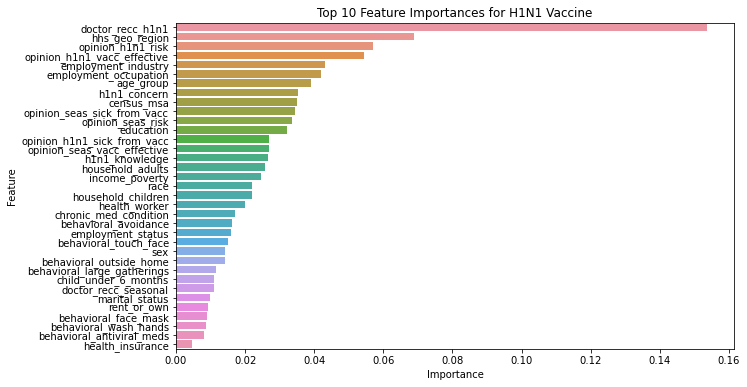

In [81]:
# Drop the 'respondent_id' column from the training data
X_h1n1_train = X_h1n1_train.drop(columns=['respondent_id'])
X_h1n1_val = X_h1n1_val.drop(columns=['respondent_id'])
X_seasonal_train = X_seasonal_train.drop(columns=['respondent_id'])
X_seasonal_val = X_seasonal_val.drop(columns=['respondent_id'])

# Train the Decision Tree Classifier again
dt_h1n1 = DecisionTreeClassifier()
dt_h1n1.fit(X_h1n1_train, y_h1n1_train)

# Get feature importances
feature_importance = dt_h1n1.feature_importances_

# Create a DataFrame for better visualization
feature_names = X_h1n1_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(importance_df.head(10))

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Top 10 Feature Importances for H1N1 Vaccine')
plt.show()



**Observation**

The feature importance values indicate that the most significant factors influencing H1N1 vaccination are:

1. Doctor recommendation (doctor_recc_h1n1): Strongly influences the likelihood of vaccination, suggesting that healthcare professional advice is crucial.
2. Geographic region (hhs_geo_region): Regional variations likely affect vaccination rates, potentially due to different healthcare access or public health initiatives.
3. Opinions on risk and vaccine effectiveness: These factors suggest that individuals' perceptions of risk and the effectiveness of the vaccine are significant in their vaccination decision.

#### Conclusions

1. Factors influencing vaccination
Demographic factors such as age, significantly affect vaccine uptake. For instance, older groups were more likely to skip vaccination. Behavioral and informational aspects, like trust in healthcare providers and access to reliable information, also play key roles.

2. Model Performance
Both logistic regression and decision tree models provided reasonable performance, with AUC scores above 0.5 for both H1N1 and seasonal vaccines.
Logistic regression models excelled in interpretability, making them suitable for identifying key predictors.
Decision trees offered a transparent, rule-based approach but showed lower AUCs, suggesting that they might require further tuning or ensemble methods for optimal performance.

3. Strategies for Stakeholders
Public health organizations should focus on tailored interventions, such as:
Educational campaigns aimed at dispelling vaccine misinformation.
Community outreach programs to improve access to vaccines for underserved populations.
Healthcare provider training to communicate vaccine benefits effectively.

#### Recommendations

1. Targeted interventions: Focus on educating people about vaccine effectiveness and safety, especially in regions with lower vaccination rates.
2. Leverage healthcare providers: Strengthen communication between healthcare professionals and individuals to boost vaccine uptake.